In [3]:
import pandas as pd

# shut off warnings
from rdkit import RDLogger                                                                                                                                                               
RDLogger.DisableLog('rdApp.*')  

from vis import convert_df_smis_to_fps, make_joined_list_of_fps_and_labels, tsne_from_pca_components, make_tsne_figure

# Read in all data and pre-process

In [4]:
data_path = '../data/'
sample_size = 100000

abx = pd.read_csv(data_path + 'static_datasets/04052022_CLEANED_v5_antibiotics_across_many_classes.csv')
print('num abx: ', len(abx))

gdb_dict = {}
for i in range(1,12):
    gdb = pd.read_csv(data_path + 'gdb/gdb13_CNOSCl/' + str(i) + '.smi', header = None)
    gdb.columns = ['SMILES']
    print('num mols in gdb-' + str(i) + ': ', len(gdb))
    if len(gdb) > sample_size:
        gdb = gdb.sample(n = sample_size)
    gdb_dict[i] = gdb
    
gdb17 = pd.read_csv(data_path + 'gdb/gdb17/GDB17.50000000.smi', header = None)
print('num gdb17: ', len(gdb17))
gdb17 = gdb17.sample(n = sample_size)
gdb17.columns = ['SMILES']

num abx:  566
num mols in gdb-1:  1
num mols in gdb-2:  3
num mols in gdb-3:  12
num mols in gdb-4:  43
num mols in gdb-5:  158
num mols in gdb-6:  953
num mols in gdb-7:  6041
num mols in gdb-8:  39589
num mols in gdb-9:  272598
num mols in gdb-10:  1915091
num mols in gdb-11:  13900390
num gdb17:  50000000


In [7]:
smis_abx, fp_abx = convert_df_smis_to_fps(abx, 'Smiles')
smis_gdbs, fp_gdbs = zip(*[convert_df_smis_to_fps(gdb_dict[i],'SMILES') for i in range(11,0,-1)]) # all the GDBs
smis_gdb11 = smis_gdbs[0] # just GDB-11
fp_gdb11 = fp_gdbs[0] # just GDB-11
smis_gdb17, fp_gdb17 = convert_df_smis_to_fps(gdb17, 'SMILES')


# t-SNE with GDB-11, GDB-17, and known antibiotics

/Users/jackie16201/opt/anaconda3/envs/chemprop010821/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/jackie16201/opt/anaconda3/envs/chemprop010821/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



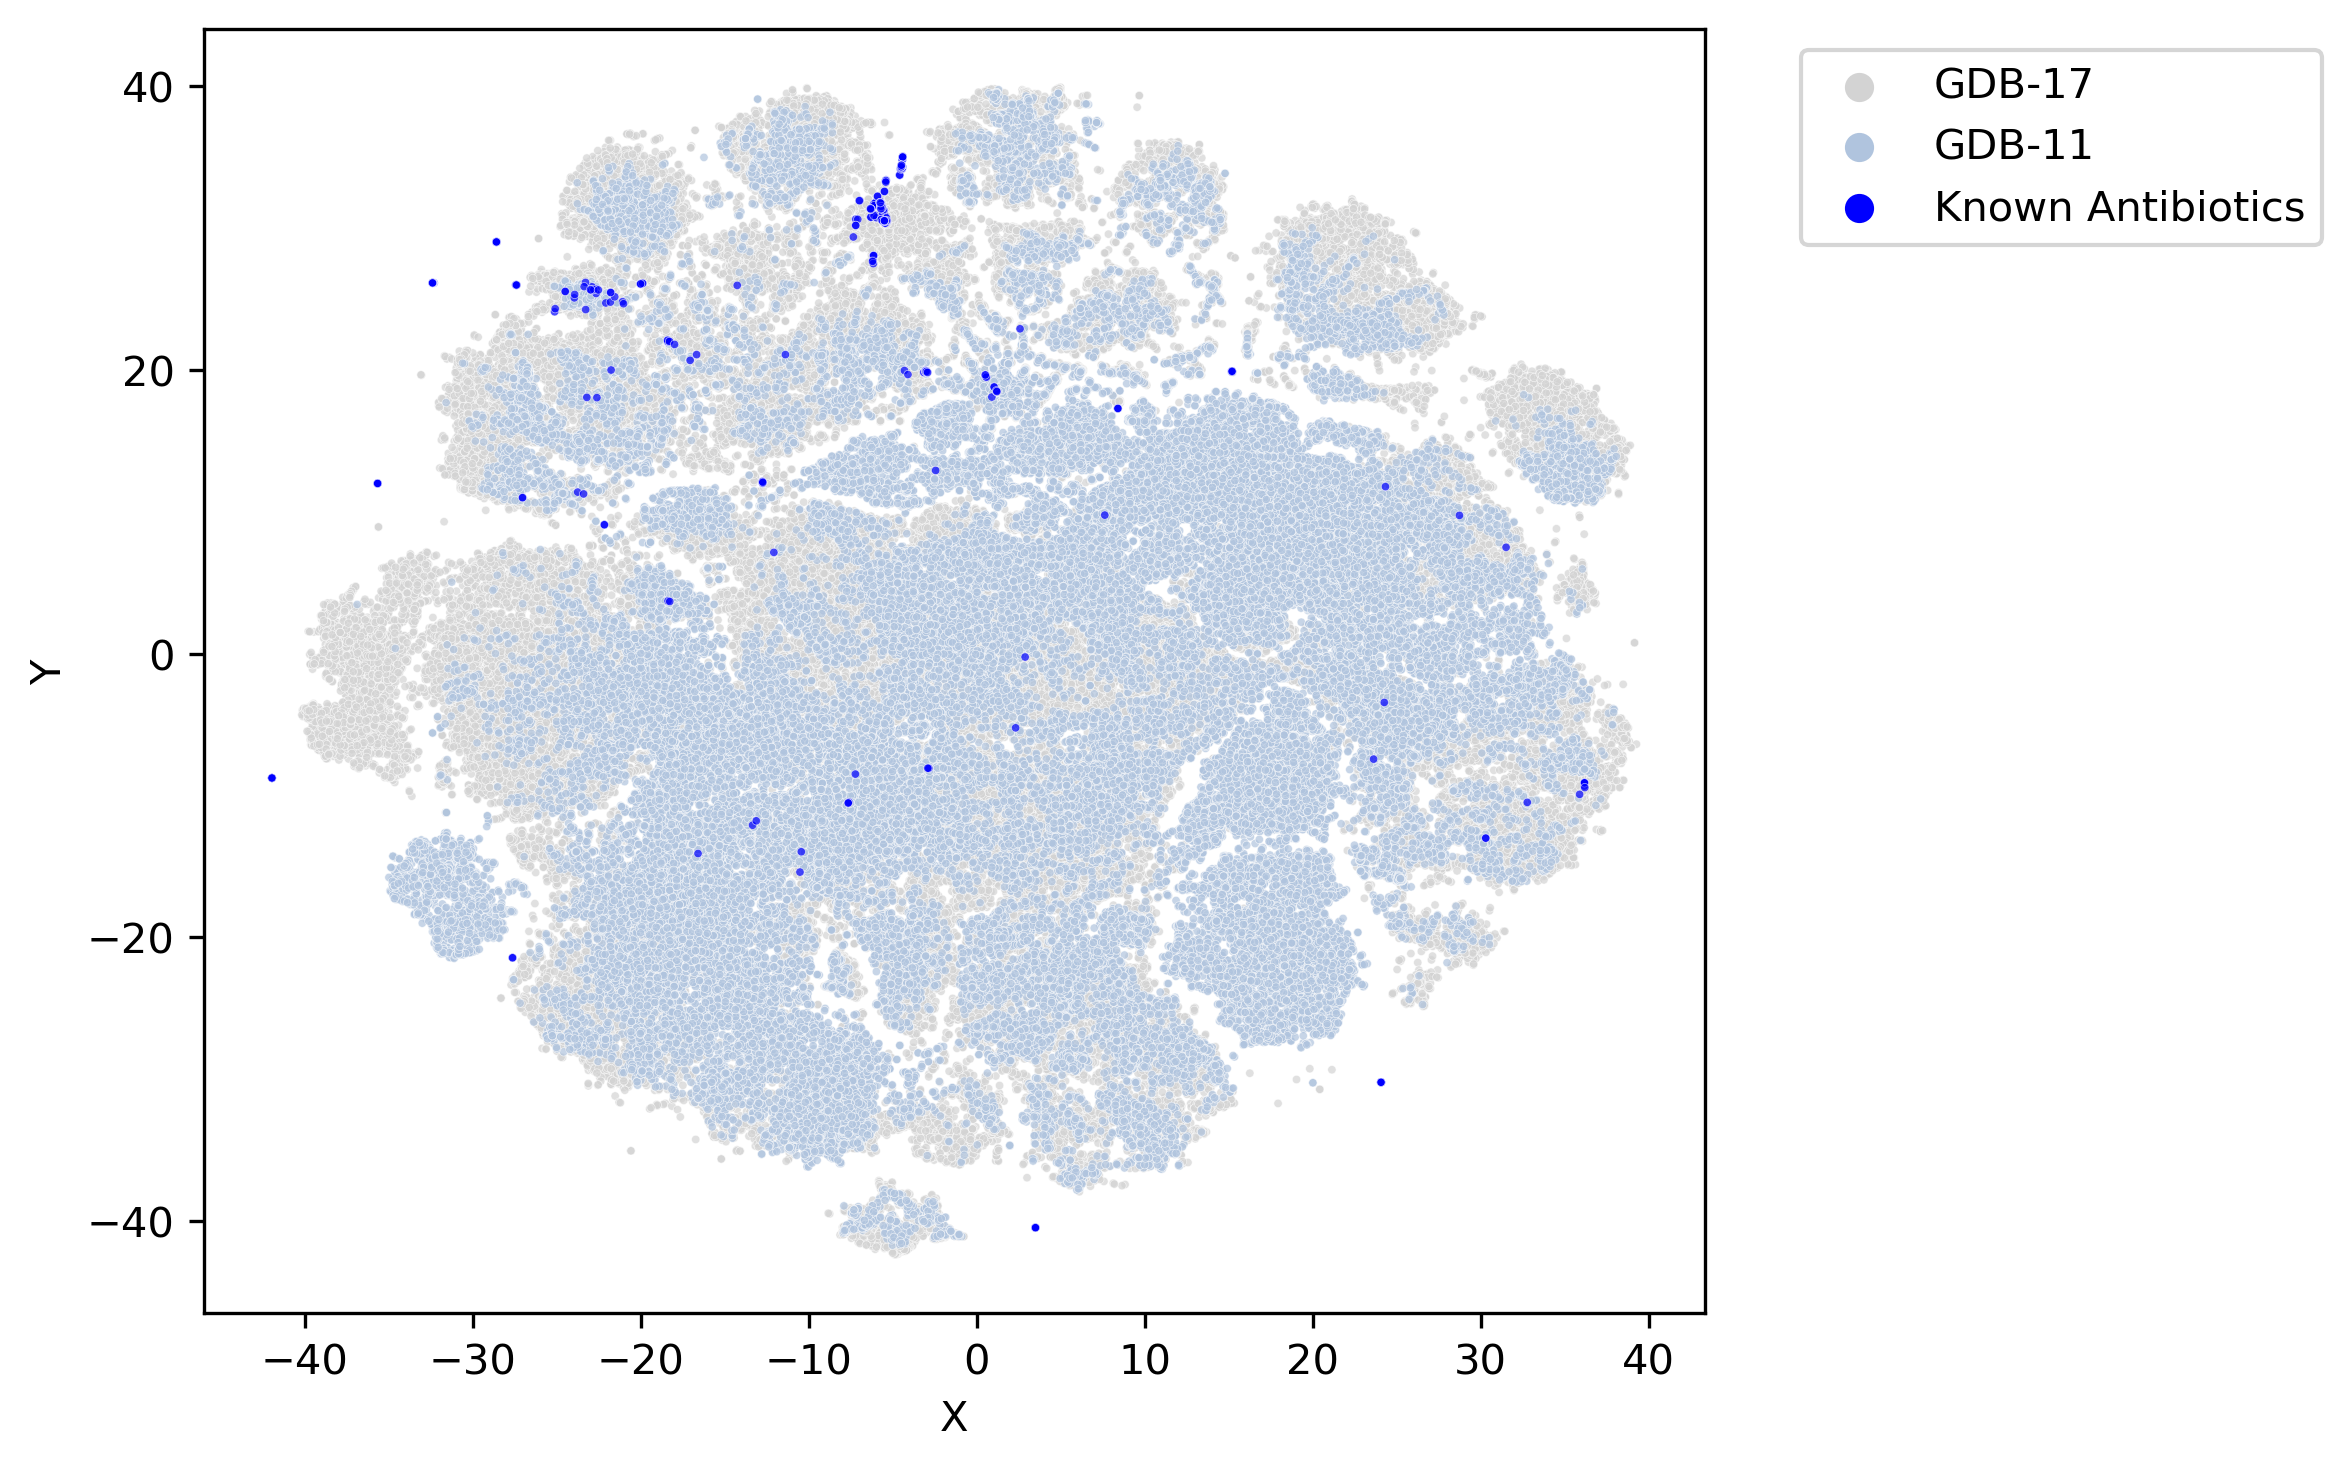

In [22]:
fps = [fp_gdb17, fp_gdb11, fp_abx]
labels = ['GDB-17', 'GDB-11', 'Known Antibiotics']
colors = ['lightgrey', 'lightsteelblue', 'blue']

fp_list, fp_labels = make_joined_list_of_fps_and_labels(fps, labels)
tsne_df = tsne_from_pca_components(fp_list, fp_labels)
make_tsne_figure(tsne_df, fp_labels, '../figure_panels/tsne_with_GDB11_17_abx', colors=colors)